In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import sklearn.model_selection as skModel
import sklearn.linear_model as skLinear
import sklearn.metrics as skMetrics
import sklearn.tree as skTree

In [3]:
df=pd.read_csv('./diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## The following values minimum value is zero which is not possible
- SkinThickness

- Insuline

- glucose

- BloodPressure

- BMI

<AxesSubplot: >

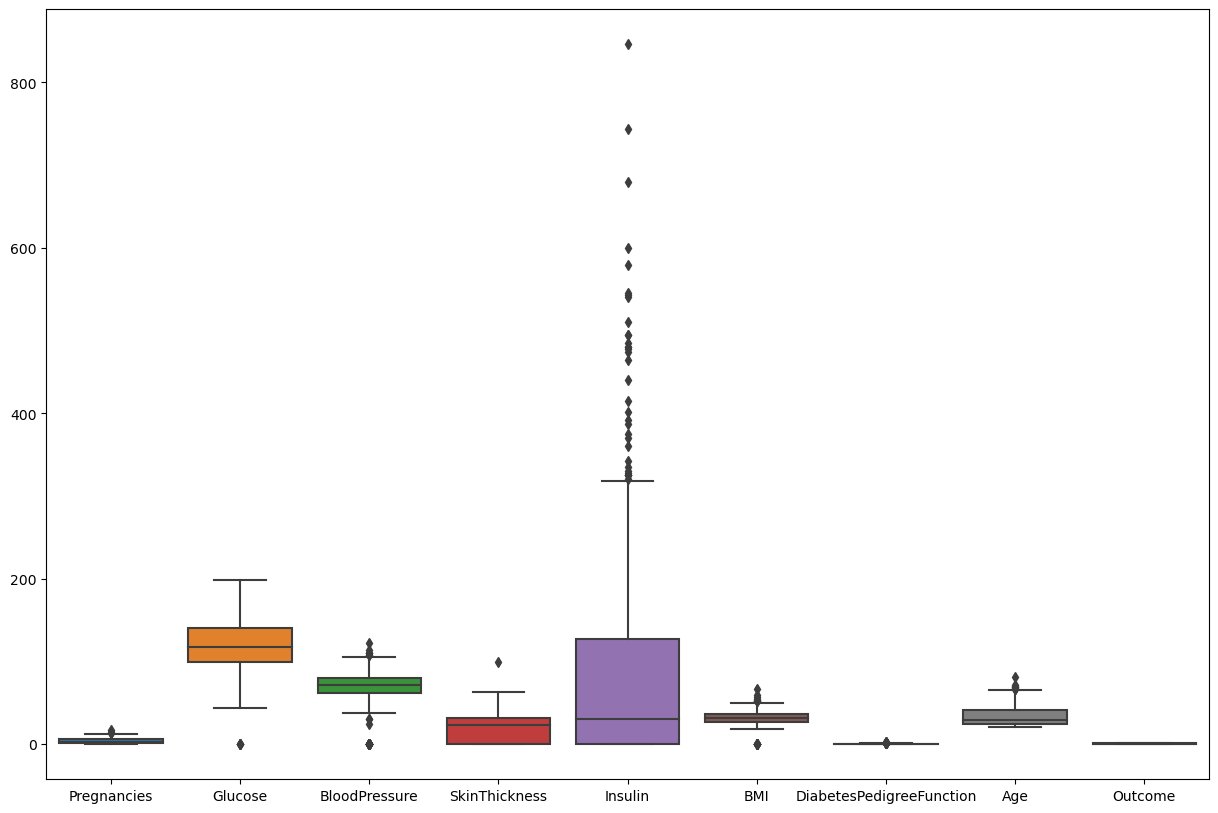

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

### As the features have outliers hence we are going to replace zeros by median() instead of mean()

In [8]:
df.Glucose.replace(to_replace=0,value=df.Glucose.median(),inplace=True)
df.BloodPressure.replace(to_replace=0,value=df.BloodPressure.median(),inplace=True)
df.SkinThickness.replace(to_replace=0,value=df.SkinThickness.median(),inplace=True)
df.Insulin.replace(to_replace=0,value=df.Insulin.median(),inplace=True)
df.BMI.replace(to_replace=0,value=df.BMI.median(),inplace=True)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Independent and Dependent Value

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.shape , y.shape

((768, 8), (768,))

In [19]:
X_train,X_test,y_train,y_test=skModel.train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.shape , y_train.shape

((576, 8), (576,))

In [21]:
X_test.shape , y_test.shape

((192, 8), (192,))

## Model Genrating

In [22]:
# Hyper Parameter Tuning
import warnings 
warnings.filterwarnings('ignore')

parameter={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6]
}
treeclassifier=skTree.DecisionTreeClassifier()
clf=skModel.GridSearchCV(treeclassifier,param_grid=parameter)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

## Scores of the model

In [23]:
score=skMetrics.accuracy_score(y_pred,y_test)
print("Accuracy Score :",score)

preccison=skMetrics.precision_score(y_pred,y_test)
print("Precision Score :",preccison)

recall=skMetrics.recall_score(y_pred,y_test)
print("Recall Score :",recall)

r1_score=2*(preccison*recall)/(preccison+recall)
print("R1 Score :",r1_score)

Accuracy Score : 0.6822916666666666
Precision Score : 0.5072463768115942
Recall Score : 0.5645161290322581
R1 Score : 0.534351145038168


In [24]:
skMetrics.roc_curve(y_pred.ravel(),y_test.ravel())

(array([0.        , 0.26153846, 1.        ]),
 array([0.        , 0.56451613, 1.        ]),
 array([2, 1, 0]))

In [25]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
tree=skTree.DecisionTreeClassifier(criterion='log_loss',max_depth=5,max_features='auto',splitter='best')

In [27]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='auto')

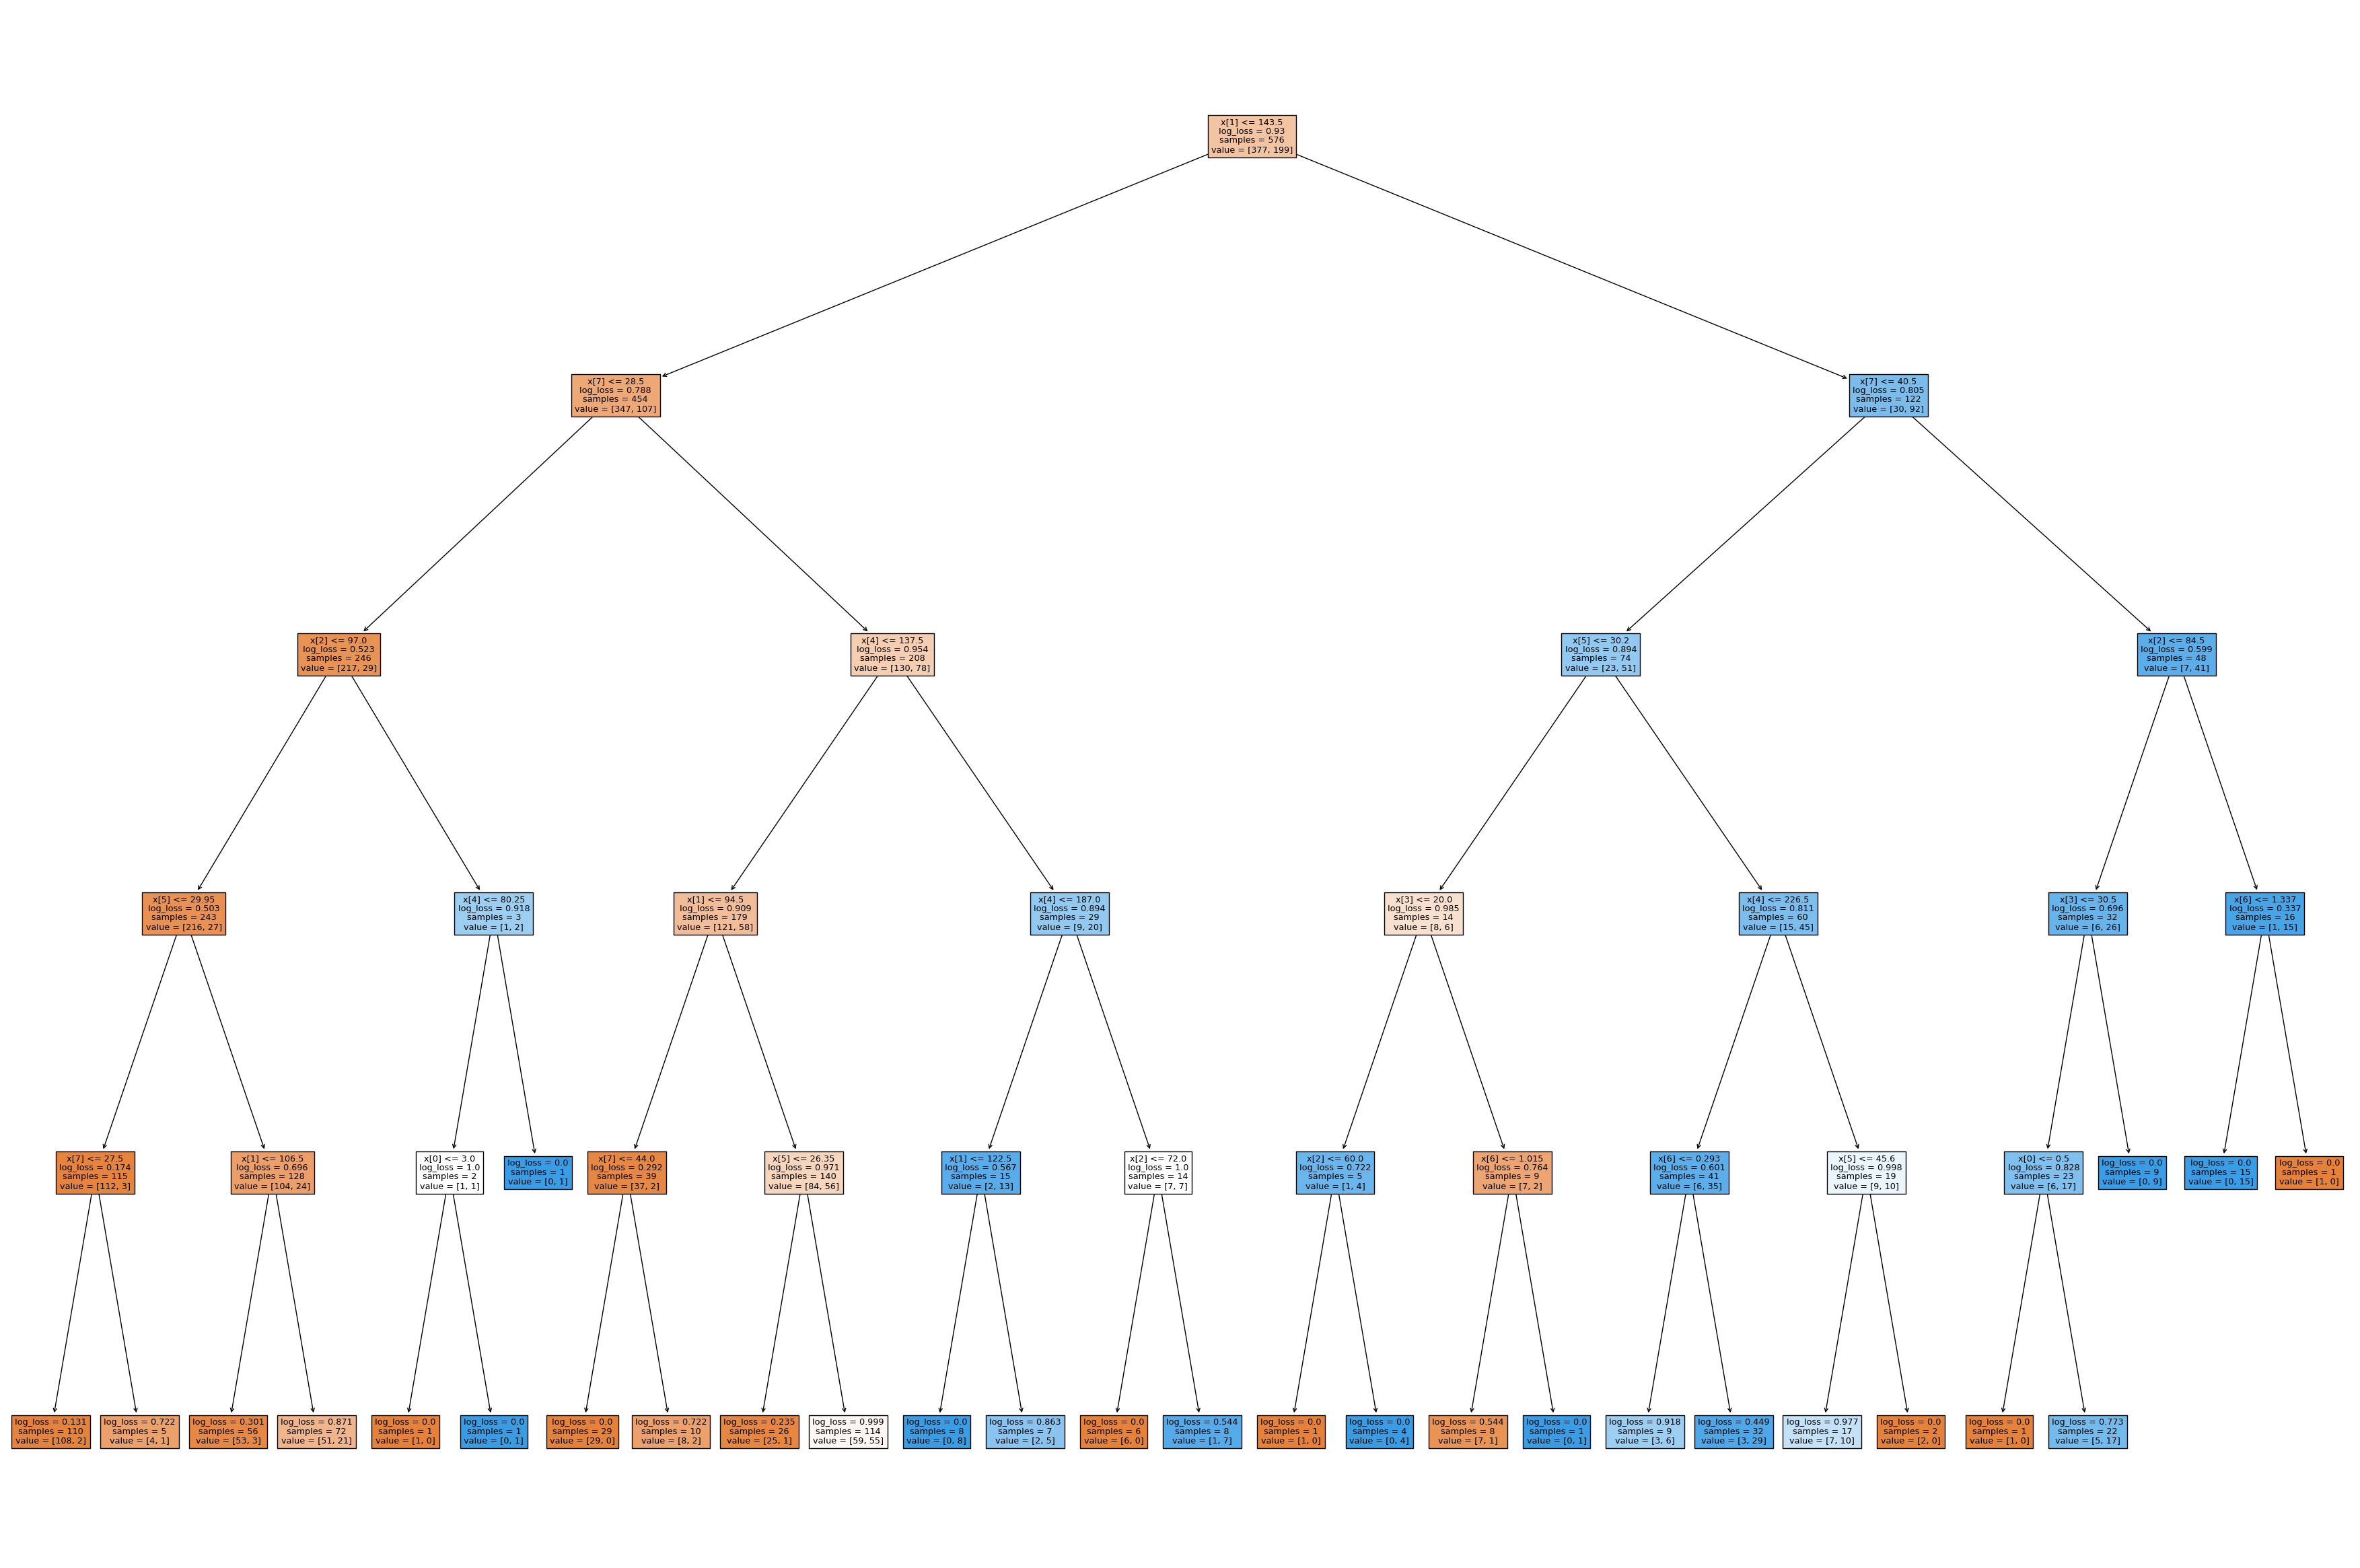

In [31]:
plt.figure(figsize=(45,30))
skTree.plot_tree(tree,filled=True)
plt.savefig('./diabietesTree.jpg')
plt.show()

## Traversing the tree
- if glucose if less than 143.5 than check age is less than is less than or  28.7
- if age is less than 28.7 than check that blood pressure is less than or equal to 97 or not 
- if blood pressure is greater than 97 than check insuline is less than or equal to 80.25 or not
- if insuline is greater than to 80 that the person is diabitic
- if insuline is less than or equal to 80.25 than check preagnenceis is less than or equal to 3 or not
- if preagnenceis is greater than to 3 than the person is diabitic else its not a diabitic

In [32]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')